In [45]:
# Import library to use in the project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [46]:
# Import dataset.csv 
url = ('../data/Sleep_health_and_lifestyle_dataset.csv')

In [47]:
# Read in the dataset
df_sleep = pd.read_csv(url)

In [48]:
# Check if work or not
df_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Checking for null values 

In [49]:
# Drop columns
df_sleep.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [50]:
# To detect null values
print(df_sleep.isnull())

     Person ID  Gender    Age  Occupation  Sleep Duration  Quality of Sleep  \
0        False   False  False       False           False             False   
1        False   False  False       False           False             False   
2        False   False  False       False           False             False   
3        False   False  False       False           False             False   
4        False   False  False       False           False             False   
..         ...     ...    ...         ...             ...               ...   
369      False   False  False       False           False             False   
370      False   False  False       False           False             False   
371      False   False  False       False           False             False   
372      False   False  False       False           False             False   
373      False   False  False       False           False             False   

     Physical Activity Level  Stress Level  BMI Cat

In [51]:
# count null values for columns
print(df_sleep.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [52]:
# Count null values in column Sleep Disorder
print(df_sleep['Sleep Disorder'].isnull())

0       True
1       True
2       True
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Name: Sleep Disorder, Length: 374, dtype: bool


In [53]:
# percent of null value in Sleep Disorder column
print(df_sleep['Sleep Disorder'].isnull().mean() * 100)

58.55614973262032


In [54]:
# Check columns datatype
df_sleep.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [55]:
# Convert column to string
# df_sleep = df_sleep.astype({'BMI Category': 'string', 'Sleep Disorder': 'string'})
df_sleep = df_sleep.astype({'BMI Category': 'string'})

In [56]:
df_sleep.dtypes

Person ID                           int64
Gender                             object
Age                                 int64
Occupation                         object
Sleep Duration                    float64
Quality of Sleep                    int64
Physical Activity Level             int64
Stress Level                        int64
BMI Category               string[python]
Blood Pressure                     object
Heart Rate                          int64
Daily Steps                         int64
Sleep Disorder                     object
dtype: object

### Cleaning data

In [57]:
# Rename Column
df_sleep.rename(columns={"Person ID": "ID"}, inplace=True)

In [58]:

# Replace columns content
df_sleep['BMI Category'] = df_sleep['BMI Category'].replace({'Normal': 'Normal Weight'}) # replace 'Normal' to 'Normal Weight'


In [59]:

df_sleep['Sleep Disorder'] = df_sleep['Sleep Disorder'].replace({'': 'MISSING'}) # replace 'None' to 'MISSING'


In [60]:
# Fill with constant value for all missing values in the column
df_sleep['Sleep Disorder'] = df_sleep['Sleep Disorder'].fillna('MISSING')

In [61]:
df_sleep

,ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,MISSING
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,MISSING
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,MISSING
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [62]:
# Verify if there are null values
print(df_sleep.isnull().sum())

ID                         0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [63]:
print(df_sleep.isnull().mean() * 100)

ID                         0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64


### Export modify dataset

In [ ]:
# Export a CSV dataframe
df_sleep.to_csv('../data/Sleep_health_and_lifestyle_dataset_corregido.csv', index=False)

### Visualization an analysis of data

##### The following chart analyzes how sleep disorders are distributed by age, which allows us to:

✅  **Identify age groups** most affected by sleep disorders

✅  **Understand the relationship** between age and sleep disorder patterns

✅  **Establish baseline data** for comparative studies

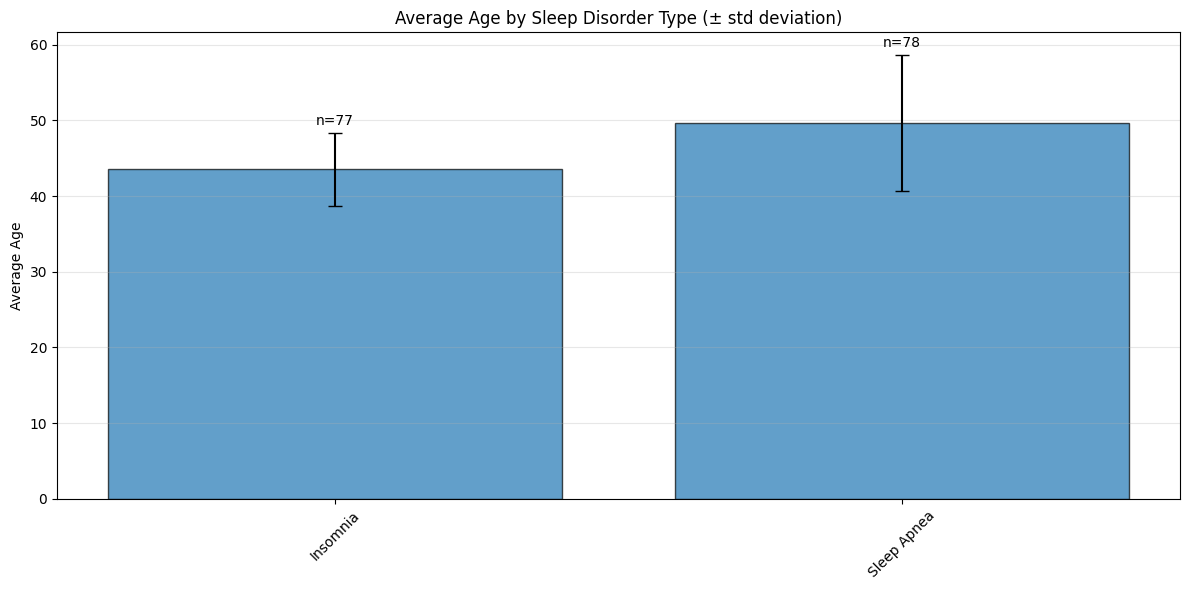

In [71]:
plt.figure(figsize=(12, 6))

# FILTER: Exclude rows where 'Sleep Disorder' is 'MISSING'
df_filtered = df_sleep[df_sleep['Sleep Disorder'] != 'MISSING']

# Calculate statistics by group
stats = df_filtered.groupby('Sleep Disorder')['Age'].agg(['mean', 'std', 'count']).reset_index()

# Bar chart with error bars
plt.bar(stats['Sleep Disorder'], stats['mean'], yerr=stats['std'], 
        capsize=5, alpha=0.7, edgecolor='black')
plt.title('Average Age by Sleep Disorder Type (± std deviation)') # standard deviation
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add sample count
for i, (mean, count) in enumerate(zip(stats['mean'], stats['count'])):
    plt.text(i, mean + stats['std'][i] + 1, f'n={count}', ha='center')

plt.tight_layout()

# Save image BEFORE of plt.show()
plt.savefig('../plot/age_by_sleep_disorder_type.png')
plt.show()

##### This chart analyzes which gender is more affected by sleep disorders and the magnitude of these differences, enabling us to:

✅ **Map the demographic distribution** of sleep apnea cases

✅ **Focus healthcare resources** on higher-risk population groups

✅ **Understand broader population** health patterns and trends

Contingency table:
Sleep Disorder  Sleep Apnea
Gender                     
Female                   67
Male                     11


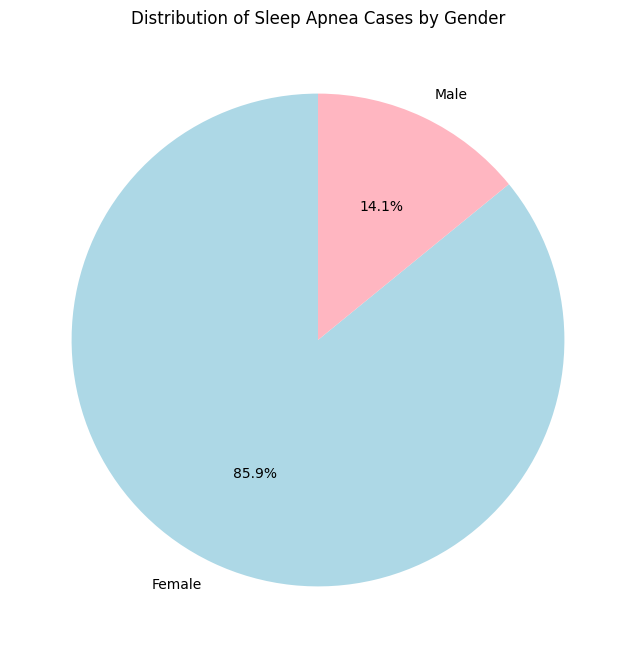

In [70]:
# Filter only the rows with Sleep Apnea
apnea_data = df_sleep[df_sleep['Sleep Disorder'] == 'Sleep Apnea']

# Create contingency table
contingency_table = pd.crosstab(apnea_data['Gender'], apnea_data['Sleep Disorder'])
print("Contingency table:")
print(contingency_table)

plt.figure(figsize=(8, 8))
gender_counts = apnea_data['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightpink'], startangle=90)
plt.title('Distribution of Sleep Apnea Cases by Gender')

# Save image BEFORE of plt.show()
plt.savefig('../plot/distribution_of_sleep_apnea_by_gender.png')

plt.show()

##### The following chart analyzes the relationship between weight variations and sleep disorders, using BMI category data and sleep disorder types as reference. In this analysis, we decided to exclude null values to make the results more accurate.

This analysis allowed us to:

✅ **Identify high-risk** groups based on BMI

✅ **Prioritize interventions** for specific populations

✅ **Understand** the population distribution of sleep disorders

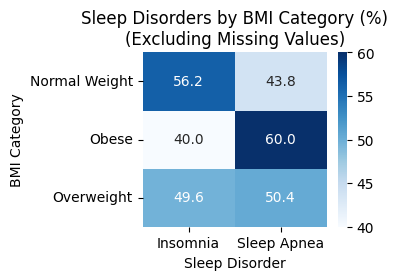

In [69]:
# Import seaborn library
import seaborn as sns

# FILTER: Exclude rows where 'Sleep Disorder' is 'MISSING'
df_filtered = df_sleep[df_sleep['Sleep Disorder'] != 'MISSING']

plt.subplot(2, 2, 2)

# Create contingency table
contingency_table = pd.crosstab(df_filtered['BMI Category'], df_filtered['Sleep Disorder'], normalize='index') * 100
sns.heatmap(contingency_table, annot=True, fmt='.1f', cmap='Blues')
plt.title('Sleep Disorders by BMI Category (%)\n(Excluding Missing Values)')
plt.tight_layout()

# Save image BEFORE of plt.show()
plt.savefig('../plot/sleep_disorder_by_bmi_category.png')

plt.show()